In [11]:
# Setup
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('../python/')
import ENDF6el as el
import flux_recoil_spec as frs

os.chdir('../data_files') #Set working directory to shorten paths

In [12]:
#Import Data
f6TR_nu = pd.read_csv('SNOLAB/Fig6TR_neutrons.txt',encoding='utf-16',comment="#",header=None)
f7TR_nu = pd.read_csv('SNOLAB/Fig7TR_neutrons.txt',comment="#",header=None)

# Si Flux and Rate Generation
* CCDs are Si for the sake of flux

In [2]:
#Flux specific to SNOLAB Si Detectors
Er = np.geomspace(100/1e6,1,100) #recoil energy
E,F,ff,ffspec = frs.SNOLAB_flux(Enmin=1e-3)

#Associated rate
drde,dsig=frs.dRdErfast(Er,E,F,N=1)

fast flux: 4000.0000000000005 n/m^2/day
175
shape of etot: (6000,)
6000 6000
LinregressResult(slope=-0.341989060170171, intercept=-12.883178144228603, rvalue=-0.9953352356165475, pvalue=2.847357267291413e-06, stderr=0.01482451947661273, intercept_stderr=0.06273875262265612)
0.009998654133395216 0.01


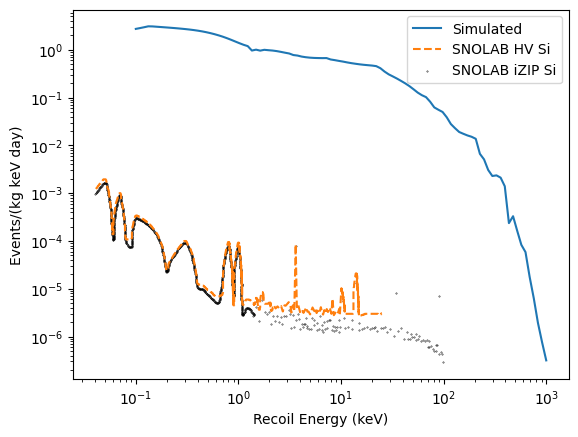

In [16]:
#Plot the data calculated above
plt.plot(Er*1000,drde,label='Simulated')
plt.plot(f6TR_nu[0],f6TR_nu[1]/365,label='SNOLAB HV Si',linestyle='--')
plt.scatter(f7TR_nu[0],f7TR_nu[1]/365,label='SNOLAB iZIP Si',color='k',s=0.1)

plt.loglog()
plt.xlabel("Recoil Energy (keV)")
plt.ylabel("Events/(kg keV day)")

plt.legend()
plt.show()

Compare shapes by re-scaling:

In [17]:
from bisect import bisect_left

def take_closest(myList, myNumber):
    """
    Assumes myList is sorted. Returns closest value to myNumber.

    If two numbers are equally close, return the smallest number.
    """
    pos = bisect_left(myList, myNumber)
    if pos == 0:
        return myList[0]
    if pos == len(myList):
        return myList[-1]
    before = myList[pos - 1]
    after = myList[pos]
    if after - myNumber < myNumber - before:
        return after
    else:
        return before

[6.69899607e-05]


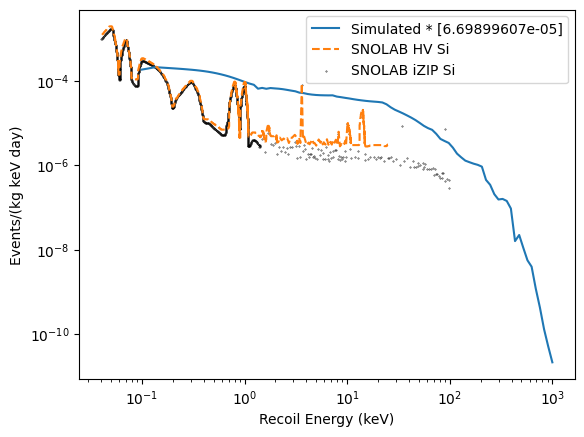

In [36]:
#finding values at 1keV
lo = f6TR_nu[1][f6TR_nu[0].index[f6TR_nu[0] == take_closest(f6TR_nu[0],1)][0]]/365
hi = drde[np.where(Er*1000 == take_closest(Er*1000,1))]
scale = lo/hi
print(scale)

#Plot the data calculated above
plt.plot(Er*1000,drde*scale,label='Simulated * '+str(scale))
plt.plot(f6TR_nu[0],f6TR_nu[1]/365,label='SNOLAB HV Si',linestyle='--')
plt.scatter(f7TR_nu[0],f7TR_nu[1]/365,label='SNOLAB iZIP Si',color='k',s=0.1)

plt.loglog()
plt.xlabel("Recoil Energy (keV)")
plt.ylabel("Events/(kg keV day)")

plt.legend()
plt.show()

# Ge Flux and Rate Generation

# Flux Extraction

# Flux Comparisons

# Save
In case I need them again. Otherwise I'll delete them after I'm done with the other plots.